# Challenge 2
An important aspect of pragmatic vector space methods is the ability to handle vectors and matrices.
A large collection of linear algebra functions is available in [SciPy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html).
These functions can be employed in conjunction with the tools available in [NumPy](http://www.numpy.org/).
We note that the main object in NumPy is the homogeneous multidimensional array.

## Matrix
We begin by creating a simple matrix.
One possible approach to complete this task is to use ```scipy.linalg.circulant(c)```.

In [4]:
from scipy.linalg import circulant
my_circ_matrix = circulant([1, 2, 3])
print(my_circ_matrix)

[[1 3 2]
 [2 1 3]
 [3 2 1]]


Alternatively, you can construct the familiar discrete Fourier transform matrix with ```scipy.linalg.dft(n)```.

In [5]:
from scipy.linalg import dft
my_dft_matrix = dft(3)
print(my_dft_matrix)

[[ 1.0+0.j         1.0+0.j         1.0+0.j       ]
 [ 1.0+0.j        -0.5-0.8660254j -0.5+0.8660254j]
 [ 1.0+0.j        -0.5+0.8660254j -0.5-0.8660254j]]


The inverse of a matrix can be computed using ```scipy.linalg.inv(a)```.

In [6]:
from scipy.linalg import inv
my_idft_matrix = inv(my_dft_matrix)
#print(my_idft_matrix)

[[ 0.33333333 +6.21949886e-17j  0.33333333 -6.68383741e-18j
   0.33333333 -5.55111512e-17j]
 [ 0.33333333 +5.55111512e-17j -0.16666667 +2.88675135e-01j
  -0.16666667 -2.88675135e-01j]
 [ 0.33333333 -1.11022302e-16j -0.16666667 -2.88675135e-01j
  -0.16666667 +2.88675135e-01j]]


The operation ```numpy.dot(a, b)``` computes the dot product of two arrays.
For 2-D arrays it is equivalent to matrix multiplication, and for 1-D arrays to inner product of vectors (without complex conjugation).

In [4]:
import numpy as np
matrix_prod1 = np.dot(my_dft_matrix, my_circ_matrix)
matrix_prod2 = np.dot(matrix_prod1, my_idft_matrix)

np.set_printoptions(suppress=True)
print(matrix_prod2)

[[ 6.0-0.j        -0.0+0.j         0.0+0.j       ]
 [-0.0-0.j        -1.5+0.8660254j -0.0+0.j       ]
 [ 0.0-0.j         0.0-0.j        -1.5-0.8660254j]]


### Questions
These steps and their solutions immediately bring up three questions.
 * Are circulant matrices always diagonalized by the discrete Fourier transform matrix and its inverse?
 * Are product of circulant matrices (of a same size) always circulant matrices?
 * Do all pairs of circulant matrices commute under matrix multiplication 

### Answers

* Circular matrices, when multiplied by same ordered DFT matrix and then by it's inverse result in diagonal matrix. An example below shows this holds true for all values of initial matrix.

In [46]:
from scipy.linalg import circulant as circ
from scipy.linalg import dft
from scipy.linalg import inv
import numpy as np


M1 = circ([1, 2, 4])
M2 = circ([-5, 4j, -3])

print(M1,"\n")
print(M2,"\n")

D1 = dft(3)
ID1 = inv(D1)

Temp = np.dot(D1,M1)
Diag = np.dot(Temp,ID1)
np.set_printoptions(suppress=True)
print("**********************************************************")
print("Product of DFT and circ matrix\n",Diag)
print("\n From this example, we can see that the (DFT x M) x IDFT always diagonalizes the circulant matrix\n")

[[1 4 2]
 [2 1 4]
 [4 2 1]] 

[[-5.+0.j -3.+0.j  0.+4.j]
 [ 0.+4.j -5.+0.j -3.+0.j]
 [-3.+0.j  0.+4.j -5.+0.j]] 

**********************************************************
Product of DFT and circ matrix
 [[ 7.+0.j         -0.+0.j          0.+0.j        ]
 [-0.-0.j         -2.+1.73205081j -0.-0.j        ]
 [ 0.-0.j          0.-0.j         -2.-1.73205081j]]

 From this example, we can see that the (DFT x M) x IDFT always diagonalizes the circulant matrix



* Dot prodcut of 3 circulant matrices result in a circulant matrix. Referring the image below, we can see that 2 arbitary circulant matrices, when multiplied results in circulant matrix.
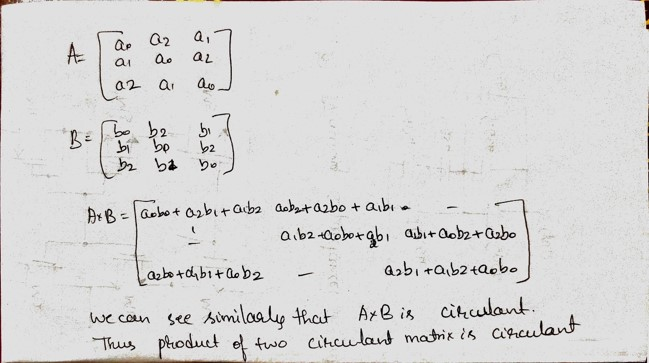
Eg.


In [44]:
from scipy.linalg import circulant as circ
from scipy.linalg import dft
from scipy.linalg import inv
import numpy as np


M1 = circ([1j, 2, 4])

print(M1,"\n")
print(M2,"\n")

M2 = circ([-5, 4j, -3])

M3 = np.dot(M1,M2)
print("Dot product=\n",M3,"\n")

print("\n From this example, we can see that product of 2 circulant matrices(even with complex elements) is always circulant\n")
print("**********************************************************")

[[ 0.+1.j  4.+0.j  2.+0.j]
 [ 2.+0.j  0.+1.j  4.+0.j]
 [ 4.+0.j  2.+0.j  0.+1.j]] 

[[-5.+0.j -3.+0.j  0.+4.j]
 [ 0.+4.j -5.+0.j -3.+0.j]
 [-3.+0.j  0.+4.j -5.+0.j]] 

Dot product=
 [[ -6.+11.j -20. +5.j -26. +0.j]
 [-26. +0.j  -6.+11.j -20. +5.j]
 [-20. +5.j -26. +0.j  -6.+11.j]] 


 From this example, we can see that product of 2 circulant matrices(even with complex elements) is always circulant

**********************************************************


* The matrix multiplication of 2 circulant matrices is commutative. Referring to the work below and the example.
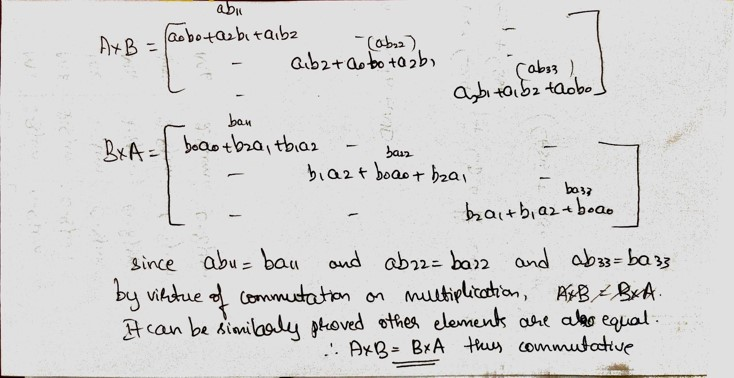

In [ ]:
from scipy.linalg import circulant as circ
from scipy.linalg import dft
from scipy.linalg import inv
import numpy as np


M1 = circ([1j, 2, 4])
M2 = circ([-5, 4j, -3])

print(M1,"\n")
print(M2,"\n")

M4 = np.dot(M1,M2)
M5 = np.dot(M2,M1)
print("Matrix M1 x M2 gives\n",M4,"\n")
print("Matrix M2 x M1 gives\n",M5)
print("\n","We can see that the multiplication of circulant matrix is commutative")




# Determinant
The determinant of a square matrix is a value derived arithmetically from the coefficients of the matrix, and it summarizes a multivariable phenomenon with a single number.
It can be computed with ```scipy.linalg.det(a)```.

In [47]:
from scipy.linalg import det
det(M1)
   

49.0

The code below demonstrates how to create a function in Python, how to vectorize a function so that it can be applied to the elements of a matrix, and how to use ```random```.

In [33]:
import math
import numpy as np
from numpy import random
from scipy.linalg import circulant
from scipy.linalg import det

my_circ_matrix = circulant([3, 2, 5])
#np.random.rand(3,3)


def my_log(x):
    return math.log(x)

my_vec_log = np.vectorize(my_log)
print("Det=",det(my_circ_matrix),"\n")

A_step1 = my_vec_log(my_circ_matrix) # Numpy already offers a vectorized natural logarithm.
# A_step1 = np.log(matrix_prod2)

max_index = 100000
my_identity = np.identity(len(A_step1))
current_value = 0.0
for my_index in range(0, max_index):
    permutation_matrix = random.permutation(my_identity)
    #shuffles rows
    
    sign_permuation = det(permutation_matrix)
        
    current_value += sign_permuation*(np.exp(np.trace(np.dot(A_step1, permutation_matrix))))
    #print("CV=", current_value)
    
a_step2 = math.factorial(len(A_step1)) * current_value / max_index
print(a_step2)



Det= 70.0 

69.9129


#### Questions
It appears that the output of the loop above is close to the determinant of the circulant matrix ```my_circ_matrix```.
 * Go through the code and provide a compelling explain explanation of why these numbers are close.
 * Is this a property of circulant matrices, or would this finding extend to arbitrary matrices over the real numbers?

### Solution
1. The property of circulant matrix is that, for a 3x3 matrix, the determinant can be found by this formula- 
###### a^3 + b^3 + c^3 - 3abc 
    * This whole program is trying to find precisely this. 
    First, the log and vectorize function returns the log values of the entries in the matrix. This ensures that the addition is converted to multiplication.
    * Next we initialize an (I)Identity matrix of the same order of this circulant matrix. We shuffle the rows of this I and obtain its determinant which takes either -1 or 1. 
    * the trace function returns sum of diagonal elements of matrix which in turn raised to power e returns the product of the diagonal elements.
    *The det of I varies such that when it is 1, either a3 or b3 or c3 is obtained from the previous step and a or b or c is obtained when it is -1 
    * Since the number of iterations is large enough, we have equal prob of these elements occuring.
    * The final average ensures that this value is close to actual det(M).
    * If we run the loop longer, the values obtained match even better.
    *For an nxn matrix, the number of permutations available is n!. Since we are running the permutation of I3 100000 times with occurence of each probable combination being 100000/3!, we ultimately multiply it with n! to get the determinant.
    

2. This can be extended to any matrix with real number elements by the virtue of same argument.


### Tasks
 * Build code to explore the fact that the determinant function is multiplicative: $\mathrm{det}(AB) = \mathrm{det}(A) \mathrm{det}(B)$.

In [25]:
from numpy import random
import numpy as np
from scipy.linalg import det 

m = np.random.randint(2,7)
print("m=", m)
n = m
print("n=",n)

A = np.random.rand(m,m)
print("Matrix A= \n",A)

B = np.random.rand(n,n)
print("\n","Matrix B= \n", B)

print("\n Determinant of individual matrices\n")
print("detA=",det(A),"\n")
print("detB=",det(B),"\n")

print("Det(A) x Det(B)=", det(A)*det(B))

C = np.dot(A,B)
print("A.B=\n",C)
print("\n Det of A.B= \n", det(C))

print("\n We can see that the values of detA x detB matches very closely with det(A.B). Thus for all practical purposes, det() is multiplicative")
print("**********************************************************************************************************")



m= 3
n= 3
Matrix A= 
 [[ 0.69054834  0.1504624   0.17940836]
 [ 0.97954955  0.28739086  0.03819446]
 [ 0.38957492  0.19256562  0.8339573 ]]

 Matrix B= 
 [[ 0.09606925  0.03193971  0.28558051]
 [ 0.32082533  0.15530248  0.87341096]
 [ 0.27976548  0.61710811  0.72036619]]

 Determinant of individual matrices

detA= 0.053506418210048104 

detB= 0.0035226491803425123 

Det(A) x Det(B)= 0.00018848434025068962
A.B=
 [[ 0.16480488  0.15613745  0.45786238]
 [ 0.19699235  0.09948915  0.55826458]
 [ 0.33251856  0.55699064  0.88019857]]

 Det of A.B= 
 0.00018848434025069114

 We can see that the values of detA x detB matches very closely with det(A.B). Thus for all practical purposes, det() is multiplicative
**********************************************************************************************************
